# Multi-layer FNN on MNIST

This is MLP (784-X^W-10) on MNIST. SGD algorithm (lr=0.1) with 100 epoches.

 

In [1]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import itertools


%matplotlib inline

In [2]:
""" Extract final stats from resman's diary file"""
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

""" Extract number of total parameters for each net config from resman's diary file"""
def parse_num_params(line0):
    line_str = ''.join(lines0)
    idx = line_str.find("Total params")
    param_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(locale.atof(param_num))

In [3]:
""" Extract accuracy at each epoch for each net config from resman's diary file"""
def parse_acc(lines0):
    line_str = ''.join(lines0)
    # print lines0

    idx = line_str.find("epochs")
    print idx
    val_acc_str = line_str[idx+14:idx+14+20] # 14 is the length of string "Total params: "
    param_num = param_str.split("\n")[0]
    return int(run_time_str)

#### Extract results from diary file

    1. Number of params
    2. Loss/Accuarcy for training/testing
    3. Runing time

In [5]:
def read_results(results_dir):
       
    depth = [0,1,2,3,4,5,6,7,8,9,10]
    width = [25,50]
    dim   = [0,50,200,500,1000] #[1500,2000]#

    ########## 1. filename list of diary ########################
    diary_names = []
    for subdir, dirs, files in os.walk(results_dir):
        for file in files:
            if file == 'diary':
                fname = os.path.join(subdir, file)
                diary_names.append(fname)

    # print diary_names
    ########## 2. Construct stats (width, depth, dim) ##########
    # acc_test_all : Tensor (width, depth, dim)
    # num_param_all: Tensor (width, depth)
    # acc_solved_all:  Tensor (width, depth)
    # dim_solved_all:  Tensor (width, depth)
    ############################################################
    nw, nd, nn= len(width), len(depth), len(dim)

    acc_test_all  = np.zeros((len(width), len(depth), len(dim)))
    nll_test_all  = np.zeros((len(width), len(depth), len(dim)))

    mode = 1         # {0: test loss, 1: test acc}
    error_files = [] #  record the error file
    
    # 2.1 construct acc_test_all and num_param_all
    for id_w in range(len(width)):
        w = width[id_w]
        for id_ll in range(len(depth)):
            ll = depth[id_ll]
            for id_d in range(len(dim)):
                d = dim[id_d]
            
                # 2.1.1 Read the results, 
                for f in diary_names:
                    if '_'+str(d)+'_'+str(ll)+'_'+str(w)+'/' in f:
                        # print "%d is in" % d + f

                        with open(f,'r') as ff:
                            lines0 = ff.readlines()
                            try:
                                R = extract_num(lines0)
                                R = np.array(R)
                                acc_test_all[id_w,id_ll,id_d]=R[1]
                                nll_test_all[id_w,id_ll,id_d]=R[0]

                            except ValueError:
                                error_files.append((w,ll,d))
                                R = np.zeros(len(R))
                                print "Error. Can not read config: depth %d, width %d and dim %d." % (ll, w, d) 
                                # break

    return acc_test_all, nll_test_all                                       

In [6]:
# collect the results from given folders

depth = [0,1,2,3,4,5,6,7,8,9,10]
width = [25,50]
dim   = [0,50,200,500,1000] #[1500,2000]#
rep   = 3

acc_test_all = np.zeros((len(width), len(depth), len(dim), rep))
nll_test_all = np.zeros((len(width), len(depth), len(dim), rep))

for j in range(rep):
    results_dir = '../results/fnn_mnist_l2_depth_run' + str(j+1)
    print results_dir
    acc_test, nll_test = read_results(results_dir)
    # print acc_test
    acc_test_all[:,:,:,j] = acc_test
    nll_test_all[:,:,:,j] = nll_test

acc_test_all[1,6,0,1] = 0.1135
nll_test_all[1,6,0,1] = 2.30402

../results/fnn_mnist_l2_depth_run1
../results/fnn_mnist_l2_depth_run2
../results/fnn_mnist_l2_depth_run3


In [10]:
# check the results
print acc_test_all.shape
print nll_test_all.shape
print "Baseline results"
print nll_test_all[:,:,0]

print "Dim %d results" % dim[-1]
print nll_test_all[:,:,2,:]

(2, 11, 5, 3)
(2, 11, 5, 3)
Baseline results
[[[ 0.30417   0.30417   0.30417 ]
  [ 0.334128  0.387907  0.366588]
  [ 0.364292  0.361124  0.321325]
  [ 0.240187  0.290186  0.254357]
  [ 2.30402   0.233375  0.270585]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]]

 [[ 0.30417   0.30417   0.30417 ]
  [ 0.159873  0.160005  0.159284]
  [ 0.38998   0.458935  0.448009]
  [ 0.332698  0.346955  0.370342]
  [ 2.30402   0.259171  2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]
  [ 2.30402   2.30402   2.30402 ]]]
Dim 1000 results
[[[ 0.958429  0.958429  0.958429]
  [ 0.766261  0.766     0.766273]
  [ 0.749182  0.748922  0.748428]
  [ 0.700768  0.700749  0.700912]
  [ 0.72018   0.717798  0.719586]
  [ 0.763549  0.

-------------------------

### Testing Accuracy wrt. Width, Depth and Dim

#### Testing Accuracy of Intrinsic dim for #parameters

[[ 0.9182      0.4032      0.6907      0.8419      0.8962    ]
 [ 0.96526667  0.43105     0.7602285   0.88108333  0.92148333]
 [ 0.96123333  0.43866667  0.77203333  0.88268333  0.9213    ]
 [ 0.96176667  0.46271667  0.77878333  0.88485     0.92141667]
 [ 0.53905     0.37823333  0.76201667  0.8835      0.92026667]
 [ 0.1135      0.45585     0.76426667  0.86745     0.91396667]
 [ 0.1135      0.386       0.7616      0.86716667  0.91408333]
 [ 0.1135      0.4121      0.74358333  0.87158333  0.91005   ]
 [ 0.1135      0.42215     0.73593333  0.8616      0.91088333]
 [ 0.1135      0.41083333  0.7391      0.85133333  0.906     ]
 [ 0.1135      0.37543333  0.73353333  0.85888333  0.9074    ]]


/home/users/chunyuan.li/tensorflow/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


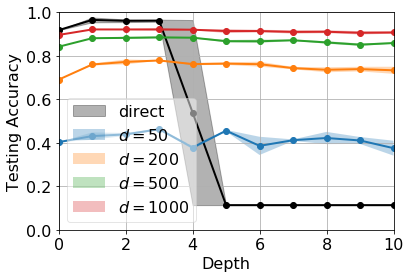

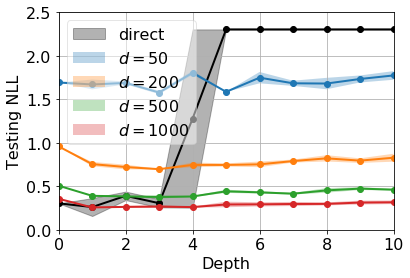

In [11]:
acc_mean = acc_test_all.mean(axis=(0,3))
acc_std  = acc_test_all.std(axis=(0,3))

nll_mean = nll_test_all.mean(axis=(0,3))
nll_std  = nll_test_all.std(axis=(0,3))


print acc_mean

size_M = (10,5) 

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

nn = len(depth)

stride = max( int(nn / 10), 1)
stride2 = max( int(nn / 5), 1)


# 2) Testing Accuracy: Acc 
fig = plt.figure(figsize=(6,4))

for d in range(5):
    if d==0:
        label_name = "direct"
        plot(depth, acc_mean[:,d], 'o-', color='k', lw=2, markevery=stride)
        fill_between(depth, acc_mean[:,d]+acc_std[:,d], acc_mean[:,d]-acc_std[:,d],  color='k', alpha=0.3, label=label_name)
    else:
        label_name = "$d=$" + str(dim[d])
        plot(depth, acc_mean[:,d], 'o-', lw=2, markevery=stride)
        fill_between(depth, acc_mean[:,d]+acc_std[:,d], acc_mean[:,d]-acc_std[:,d], alpha=0.3, label=label_name)

plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')
# ax.set_title('width %d, depth %d' %(width[i], depth[j]))
plt.grid()
legend(loc='best', fancybox=True, framealpha=0.5)
plt.xlim([0,10])
plt.ylim([0,1.0])
fig.savefig("figs/acc_fnn_mnist_depth.pdf", bbox_inches='tight')        
plt.show()


# 3) Testing Loss: NLL 
fig = plt.figure(figsize=(6,4))
for d in range(5):
    if d==0:
        label_name = "direct"
        plot(depth, nll_mean[:,d], 'o-', color='k', lw=2, markevery=stride)
        fill_between(depth, nll_mean[:,d]+nll_std[:,d], nll_mean[:,d]-nll_std[:,d],  color='k', alpha=0.3, label=label_name)
    else:
        label_name = "$d=$" + str(dim[d])
        plot(depth, nll_mean[:,d], 'o-', lw=2, markevery=stride)
        fill_between(depth, nll_mean[:,d]+nll_std[:,d], nll_mean[:,d]-nll_std[:,d], alpha=0.3, label=label_name)

plt.xlabel('Depth')
plt.ylabel('Testing NLL')
# ax.set_title('width %d, depth %d' %(width[i], depth[j]))
plt.grid()
legend(loc='best', fancybox=True, framealpha=0.5)
plt.xlim([0,10])
plt.ylim([0,2.50])
fig.savefig("figs/nll_fnn_mnist_depth.pdf", bbox_inches='tight')        
plt.show()



#### Intrinsic dim for #parameters

## Performance comparison with Baseline